# 03 Pandas ①

#### 주의 : 판다스의 모든 것을 다루지 않습니다. Machine Learning 또는 Deep Learning을 공부하기 위해 최소한 알아야 하는 범위만을 다룹니다.



## 0.라이브러리 불러오기 & 데이터 업로드

* 라이브러리 불러오는 방법과 별칭(alias)

In [2]:
import pandas as pd
import numpy as np

## 1.Pandas Series

(이번 과정에서는 시리즈를 다루지 않습니다. 현장에서 잘 사용되지 않기 때문입니다.)

* 판다스 시리즈, 넘파이 1차원어레이, 리스트를 비교해봅시다.

In [3]:
# Pandas Series
stock = pd.Series([92600, 92400, 92100, 94300, 92300])
print(stock[1:])

# Numpy rank 1 array
np_stock = np.array([92600, 92400, 92100, 94300, 92300])
print(np_stock[:])

# python List
list_stock = [92600, 92400, 92100, 94300, 92300]
print(list_stock[1:] )


1    92400
2    92100
3    94300
4    92300
dtype: int64
[92600 92400 92100 94300 92300]
[92400, 92100, 94300, 92300]


판다스 시리즈는 지정가능한 인덱스와 값으로 저장할수 있다.

In [4]:
# 인덱스 이름을 변경할 수도 있음.
stock = pd.Series([92600, 92400, 92100, 94300, 92300]
         , index=['2018-02-19', '2018-02-18','2018-02-17','2018-02-16','2018-02-15'])
print(stock)
print('---------------------------')
print(stock.index)
print('---------------------------')
print(stock.values)

2018-02-19    92600
2018-02-18    92400
2018-02-17    92100
2018-02-16    94300
2018-02-15    92300
dtype: int64
---------------------------
Index(['2018-02-19', '2018-02-18', '2018-02-17', '2018-02-16', '2018-02-15'], dtype='object')
---------------------------
[92600 92400 92100 94300 92300]


* 인덱스 기준으로 연산 가능

In [5]:
# 인덱스 위치가 달라도, 인덱스 값을 기준으로 연산 수행.
score_math1 = pd.Series([90,80,85], index = ['james', 'daniel','bill'])
score_math2 = pd.Series([80,89,95], index = [ 'james','bill', 'daniel'])
print(score_math1)
print('---------------------------')
print(score_math2)
print('---------------------------')
print(score_math1 + score_math2)

james     90
daniel    80
bill      85
dtype: int64
---------------------------
james     80
bill      89
daniel    95
dtype: int64
---------------------------
bill      174
daniel    175
james     170
dtype: int64


* Series의 Index 이름을 변경할 수 있다

In [6]:
stock = pd.Series([92600, 92400, 92100, 94300, 92300]
         , index=['2018-02-19', '2018-02-18','2018-02-17','2018-02-16','2018-02-15'])
print(stock)


2018-02-19    92600
2018-02-18    92400
2018-02-17    92100
2018-02-16    94300
2018-02-15    92300
dtype: int64


<AxesSubplot:>

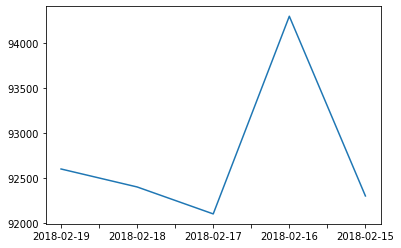

In [7]:
stock.plot()

## 2.Pandas Dataframe

### 2.1 CSV파일에서 데이터 불러오기

In [34]:
# Loading CSV files
# df = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/Graduate_apply.csv')  
df = pd.read_csv('Graduate_apply.csv')

### 2.2 데이터 미리 보기

In [35]:
# 첫 5개 행의 데이터를 보여줍니다.
df.head()
#print(df.head())

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [36]:
# 마지막 3개 행의 데이터를 보여줍니다.
df.tail(3)

,admit,gre,gpa,rank
397,0,460,2.63,2
398,0,700,3.65,2
399,0,600,3.89,3


In [37]:
# 데이터 프레임 모양 확인 - (rows, cols) tuple
df.shape

(400, 4)

* 칼럼정보 조회

In [38]:
# 칼럼명 출력
print(df.columns)
print('--------------------------------------------------------')
print(list(df))

Index(['admit', 'gre', 'gpa', 'rank'], dtype='object')
--------------------------------------------------------
['admit', 'gre', 'gpa', 'rank']


여기서  dtype='object' 은 칼럼 명에 대한 타입을 말하는 것입니다.  
object는 문자열 의미

In [39]:
# 각 칼럼의 데이터 타입
df.dtypes

admit      int64
gre        int64
gpa      float64
rank       int64
dtype: object

* 기초통계량 : 평균, 표준편차, quartile

In [40]:
# 기초통계량
df.describe() 

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


* 정렬

In [101]:
df.sort_index(axis=1, ascending=False).head()

,rank,gre,gpa,admit
0,3,380,3.61,0
1,3,660,3.67,1
2,1,800,4.00,1
3,4,640,3.19,1
4,4,520,2.93,0


In [99]:
# index로 정렬
df.sort_index(axis=0, ascending=False).head()

,admit,gre,gpa,rank
399,0,600,3.89,3
398,0,700,3.65,2
397,0,460,2.63,2
396,0,560,3.04,3
395,0,620,4.00,2


In [42]:
# 특정 컬럼의 값으로 정렬
df.sort_values(by=['admit', 'gpa'], ascending=[False, True]).head()

,admit,gre,gpa,rank
372,1,680,2.42,1
384,1,480,2.62,2
341,1,560,2.65,3
121,1,480,2.67,2
39,1,520,2.68,3


<br>

### 실습1 : csv 파일 불러오기, 데이터 살펴보기1

In [18]:
import pandas as pd
import numpy as np

In [26]:
# 1) pandas read_csv 함수를 이용하여 
# https://raw.githubusercontent.com/DA4BAM/dataset/master/garak_market_price.CSV 파일을 읽고, 
# g_price 변수에 담습니다. 
g_price = pd.read_csv('garak_market_price.CSV')

# 2) g_price의 shape를 확인합니다.

g_price.shape

(11026, 6)

In [27]:
# 3) g_price의 칼럼명과 각 칼럼의 데이터 타입을 확인합니다.
g_price.dtypes



Date            int64
ProductID       int64
Grade           int64
KG              int64
ProductName    object
Price           int64
dtype: object

In [28]:
# 4) g_price의 데이터의 첫 3행의 데이터와 마지막 3행의 데이터를 출력합니다.
print(g_price.head(3))
print(g_price.tail(3))


       Date  ProductID  Grade  KG ProductName  Price
0  20190103      15100      0  10         고구마  44450
1  20190103      15100      1  10         고구마  34122
2  20190103      15100      2  10         고구마  24459
           Date  ProductID  Grade  KG ProductName  Price
11023  20191231      24400      3  12          양파   7795
11024  20191231      24400      3  15          양파   9572
11025  20191231      24400      3  20          양파  11892


In [30]:
# 5) g_price의 데이터를 'Price' 칼럼을 기준으로 내림차순으로 정렬합니다. 
g_price.sort_values(by=['Price'], ascending=[False]).head()


,Date,ProductID,Grade,KG,ProductName,Price
8706,20191023,23200,1,20,당근,61071
8628,20191021,23200,1,20,당근,57885
8667,20191022,23200,1,20,당근,57540
8745,20191024,23200,1,20,당근,57170
8901,20191029,23200,1,20,당근,56734


### 2.3 원하는 데이터 조회하기

#### 칼럼 명으로 조회

In [44]:
# 칼럼명으로 조회 1 칼럼명에 한글이나 특수문자 들어가면 문제가 될 수 있음. 비추!
df.gre.head()
# df_gre1 = df.gre.head()
# type(df_gre1)

0    380
1    660
2    800
3    640
4    520
Name: gre, dtype: int64

In [45]:
# 칼럼명으로 조회 2
df['gre'].head()

# df_gre2 = df['gre'].head()
# type(df_gre2)

0    380
1    660
2    800
3    640
4    520
Name: gre, dtype: int64

In [46]:
# 중복 제거 .unique()
df['admit'].unique()         

array([0, 1])

In [49]:
df['gre'].head()# 결과를 pangas series(1차원)로 나옴

0    380
1    660
2    800
3    640
4    520
Name: gre, dtype: int64

In [47]:
# 칼럼명으로 조회 3
df[['gre']].head()# 결과를 pandas dataframe(2차원)으로 나옴

,gre
0,380
1,660
2,800
3,640
4,520


In [50]:
# 두 개의 칼럼 동시 조회
df[['gpa', 'gre']].head()

,gpa,gre
0,3.61,380
1,3.67,660
2,4.00,800
3,3.19,640
4,2.93,520


#### 행이름/조건, 열이름으로 조회하기 : .loc[       ]
* .loc[행이름/조건] ==> [행이름/조건] loc 안쓰는 것과 동일함
* .loc[행이름/조건, 열이름]

In [51]:
df.loc[0:5]#행이름으로 조회

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
5,1,760,3.00,2


In [52]:
df.iloc[0:5]#index로 조회

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [53]:
df.loc[0:5, ['gre','gpa']]
# df.loc[0:5, 'gre'] # 시리즈로 결과가 나온다.

,gre,gpa
0,380,3.61
1,660,3.67
2,800,4.00
3,640,3.19
4,520,2.93
5,760,3.00


In [56]:
df.loc[df.gpa > 3]
# df[df.gpa > 3]

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
7,0,400,3.08,2
...,...,...,...,...
394,1,460,3.99,3
395,0,620,4.00,2
396,0,560,3.04,3
398,0,700,3.65,2


<br>

#### 행번호, 열번호로 조회하기 .iloc()

In [57]:
# 행번호 1 조회 : 1개 행으로 조회하면 pandas series
print(df.iloc[1])

df1 = df.iloc[1]
print(type(df1))

admit      1.00
gre      660.00
gpa        3.67
rank       3.00
Name: 1, dtype: float64
<class 'pandas.core.series.Series'>


In [58]:
# 행번호 0~5 조회 : 범위로 조회하면 dataframe
df.iloc[0:5]

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [59]:
# 위 결과를 .loc와 비교해 봅시다.
df.loc[0:5]

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
5,1,760,3.00,2


In [60]:
# 0번째 row, 0번째 column ==> 단일 값
df.iloc[0, 0]

0

In [61]:
# 0~4 rows & 0~2 columns ==> 범위로 조회하면 dataframe
df.iloc[0:4, 0:2]

,admit,gre
0,0,380
1,1,660
2,1,800
3,1,640


<br>

#### 조건으로 조회하기

In [62]:
# 조건을 비교한 결과(True/False) 값으로 반환됨. 
(df['gpa'] > 3.5).head()

0     True
1     True
2     True
3    False
4    False
Name: gpa, dtype: bool

In [63]:
# 조건을 비교한 결과 True 인 값을 조회
df[df['gpa'] > 3.5].head()
# df.loc[df['gpa'] > 3.5].head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
9,0,700,3.92,2
10,0,800,4.00,4


In [64]:
# (다양한 방법)아래 두 문장은 방금전 문장과 동일한 결과
df[df.gpa > 3.5].head()
#df.loc[df.gpa > 3.5].head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
9,0,700,3.92,2
10,0,800,4.00,4


In [65]:
# 여러값을 한꺼번에 비교할 때 .isin()
df[df['rank'].isin([1, 2])].head()


,admit,gre,gpa,rank
2,1,800,4.00,1
5,1,760,3.00,2
6,1,560,2.98,1
7,0,400,3.08,2
9,0,700,3.92,2


In [66]:
# 위 문장을 분리하면
df[(df['rank'] == 1) | (df['rank'] == 2)].head()


,admit,gre,gpa,rank
2,1,800,4.00,1
5,1,760,3.00,2
6,1,560,2.98,1
7,0,400,3.08,2
9,0,700,3.92,2


주의할점! dataframe에서 []안에 조건을 여러개 연결할때
* and = &, or = |
* 그리고 각 조건들은 ()로 묶여 있어야 한다. : (조건1) & (조건2)

In [67]:
# and, or 조건으로 여러 조건 함께 조회하기 : and = &, or = |
df[(df['gpa'] > 3.0) & (df['rank'] == 3)].head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
8,1,540,3.39,3
15,0,480,3.44,3
20,0,500,3.17,3


문자열에 있는 특정 문자 검색하고자 할 때는...

In [68]:
# Dataframes 생성
d = {
   'col1': ['Item0', 'Item0', 'Item1', 'Item1'],
   'col2': ['Gold', 'Bronze', 'Gold', 'Silver'],
   'col3': [1, 2, 3, 4]
}
df1 = pd.DataFrame(d)
print(df1)
# 문자열이 들어있는 row만 조회
print(df1[df1.col2.str.contains('ilver')])

    col1    col2  col3
0  Item0    Gold     1
1  Item0  Bronze     2
2  Item1    Gold     3
3  Item1  Silver     4
    col1    col2  col3
3  Item1  Silver     4


### 실습2 : 원하는 데이터 조회하기

In [72]:
# pandas read_csv 함수를 이용하여 
# https://raw.githubusercontent.com/DA4BAM/dataset/master/garak_market_price.CSV 을 읽고, 
# g_price에 담습니다. 
g_price = pd.read_csv('garak_market_price.CSV')

# data_frame의 shape를 확인합니다.
print(g_price.shape)

# data_frame의 칼럼명과 각 칼럼의 데이터 타입을 확인합니다.
g_price.columns


(11026, 6)


Index(['Date', 'ProductID', 'Grade', 'KG', 'ProductName', 'Price'], dtype='object')

In [74]:
# 1) unique 함수를 가지고 'ProductName'의 칼럼에 들어있는 데이터의 종류를 확인합니다.
g_price['ProductName'].unique()


array(['고구마', '토마토', '무', '당근', '양파', '고구마(호박밤)'], dtype=object)

In [76]:
# 2) 상품명이 고구마 데이터를 조회하시오.
g_price[g_price['ProductName'] == '고구마'].head()


,Date,ProductID,Grade,KG,ProductName,Price
0,20190103,15100,0,10,고구마,44450
1,20190103,15100,1,10,고구마,34122
2,20190103,15100,2,10,고구마,24459
3,20190103,15100,3,10,고구마,11400
35,20190104,15100,0,10,고구마,48447


In [85]:
g_price.loc[g_price['ProductName'] == '고구마'].head()

,Date,ProductID,Grade,KG,ProductName,Price
0,20190103,15100,0,10,고구마,44450
1,20190103,15100,1,10,고구마,34122
2,20190103,15100,2,10,고구마,24459
3,20190103,15100,3,10,고구마,11400
35,20190104,15100,0,10,고구마,48447


In [82]:
# 3) 고구마 10kg, grade 가 0(특)인 데이터를 조회하시오.
g_price['Grade'].unique()
g_price[(g_price['ProductName'] == '고구마') & (g_price['KG'] == 10) & (g_price['Grade'] == 0)].head()


,Date,ProductID,Grade,KG,ProductName,Price
0,20190103,15100,0,10,고구마,44450
35,20190104,15100,0,10,고구마,48447
70,20190105,15100,0,10,고구마,43085
105,20190107,15100,0,10,고구마,51744
140,20190108,15100,0,10,고구마,47523


In [86]:
(g_price['ProductName'] == '양파') & g_price['KG'].isin([15,20]) & g_price['Grade'].isin([0,1])

0        False
1        False
2        False
3        False
4        False
         ...  
11021    False
11022    False
11023    False
11024    False
11025    False
Length: 11026, dtype: bool

In [84]:
# 4) 양파, 15kg 혹은 20kg, 등급이 0,1 인 데이터를 조회하시오
g_price[(g_price['ProductName'] == '양파') & g_price['KG'].isin([15,20]) & g_price['Grade'].isin([0,1])].head()


,Date,ProductID,Grade,KG,ProductName,Price
21,20190103,24400,0,15,양파,12954
22,20190103,24400,0,20,양파,16019
25,20190103,24400,1,15,양파,11874
26,20190103,24400,1,20,양파,14808
56,20190104,24400,0,15,양파,12664


### 실습3 : 원하는 데이터 조회하기2

In [92]:
# pandas read_csv 함수를 이용하여 
# https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic_simple.csv 을 읽고, 
# titanic 에 담습니다. 
titanic = pd.read_csv('titanic_simple.csv')

# data_frame의 shape를 확인합니다.
print(titanic.shape)

# data_frame의 칼럼명과 각 칼럼의 데이터 타입을 확인합니다.
print(titanic.columns)


(891, 8)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Fare',
       'Embarked'],
      dtype='object')


In [93]:
# 1) unique 함수를 가지고 'Embarked'의 칼럼에 들어있는 데이터의 종류를 확인합니다.
titanic['Embarked'].unique()


array(['Southhampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [95]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,Southhampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,Southhampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,Southhampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,Southhampton


In [97]:
# 2) Embarked이 Southhampton 이고, 성별이 여자이고, 나이가 10살 이하인 탑승객의 데이터를 조회하시오.
titanic[(titanic['Embarked'] == 'Southhampton') & (titanic['Sex'] == 'female') & (titanic['Age'] <= 10)].head()


,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,16.700,Southhampton
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,21.075,Southhampton
58,59,1,2,"West, Miss. Constance Mirium",female,5.0,27.750,Southhampton
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,31.275,Southhampton
147,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,34.375,Southhampton


In [107]:
# 3) 운임을 제일 많이 내고 탄 사람을 조회하시오
titanic.sort_values(by=['Fare'], ascending=[False]).head(1)
titanic.Fare.max()
titanic.loc[titanic['Fare'] == titanic.Fare.max()]

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,512.3292,Cherbourg
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,512.3292,Cherbourg
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,512.3292,Cherbourg


<br>

### 2.5 Dataframe 수정하기

In [151]:
# Dataframes 생성
d = {
   'col1': ['Item0', 'Item0', 'Item1', 'Item1'],
   'col2': ['Gold', 'Bronze', 'Gold', 'Silver'],
   'col3': [1, 2, 5, 3],
   'col4': [1000, 300, 5000, 600]
}
df1 = pd.DataFrame(d)

In [152]:
df1

,col1,col2,col3,col4
0,Item0,Gold,1,1000
1,Item0,Bronze,2,300
2,Item1,Gold,5,5000
3,Item1,Silver,3,600


In [153]:
df1.loc[df1.col2 == 'Gold'] 

,col1,col2,col3,col4
0,Item0,Gold,1,1000
2,Item1,Gold,5,5000


In [154]:
df1.loc[df1.col2 == 'Gold', 'col2'] 

0    Gold
2    Gold
Name: col2, dtype: object

In [124]:
# 행 이름과 칼럼이름으로 조회 & 수정
df1.loc[df1.col2 == 'Gold', 'col2'] = 'Diamond' 
df1

,col1,col2,col3,col4
0,Item0,Diamond,1,1000
1,Item0,Bronze,2,300
2,Item1,Diamond,5,5000
3,Item1,Silver,3,600


In [125]:
# 행번호, 열번호로 조회 & 수정
df1.iloc[1, 1] = 'Bronze2' 
df1

,col1,col2,col3,col4
0,Item0,Diamond,1,1000
1,Item0,Bronze2,2,300
2,Item1,Diamond,5,5000
3,Item1,Silver,3,600


* 칼럼이름 수정하기

In [126]:
df1.columns.values

array(['col1', 'col2', 'col3', 'col4'], dtype=object)

In [127]:
# 전체수정
#df1.columns = ['Item', 'Item_Name', 'Qty', 'Amt']

# 부분수정
df1.columns.values[2:] = ['Qty', 'Amt']

In [128]:
df1.head()

,col1,col2,Qty,Amt
0,Item0,Diamond,1,1000
1,Item0,Bronze2,2,300
2,Item1,Diamond,5,5000
3,Item1,Silver,3,600


In [129]:
df1.rename(columns={'col1':'Item', 'col2':'Item_Name'}, inplace = False)# inplace = False 하면, 실제 바뀌지 않고, 출려으로만 보여줌

,Item,Item_Name,Qty,Amt
0,Item0,Diamond,1,1000
1,Item0,Bronze2,2,300
2,Item1,Diamond,5,5000
3,Item1,Silver,3,600


In [130]:
df1

,col1,col2,Qty,Amt
0,Item0,Diamond,1,1000
1,Item0,Bronze2,2,300
2,Item1,Diamond,5,5000
3,Item1,Silver,3,600


In [131]:
#rename으로 수정할 수도 있습니다.
df1.rename(columns={'col1':'Item', 'col2':'Item_Name'}, inplace = True)

In [132]:
df1.head()

,Item,Item_Name,Qty,Amt
0,Item0,Diamond,1,1000
1,Item0,Bronze2,2,300
2,Item1,Diamond,5,5000
3,Item1,Silver,3,600


In [133]:
# 새로운 칼럼 추가
df1['Unit_Price'] = df1['Amt'] / df1['Qty']
df1

,Item,Item_Name,Qty,Amt,Unit_Price
0,Item0,Diamond,1,1000,1000.0
1,Item0,Bronze2,2,300,150.0
2,Item1,Diamond,5,5000,1000.0
3,Item1,Silver,3,600,200.0


In [134]:
# 여러 칼럼 동시 제거하기 
df1.drop(['Item_Name', 'Amt'], axis=1, inplace=True) #axis=1 는 열을 의미
df1

,Item,Qty,Unit_Price
0,Item0,1,1000.0
1,Item0,2,150.0
2,Item1,5,1000.0
3,Item1,3,200.0


### 실습4 : 데이터프레임 수정하기

In [172]:
# 1)https://raw.githubusercontent.com/DA4BAM/dataset/master/garak_market_price.CSV 을 읽고, g_price에 담습니다. 
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

garak_market_price = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/garak_market_price.CSV')


garak_market_price

,Date,ProductID,Grade,KG,ProductName,Price
0,20190103,15100,0,10,고구마,44450
1,20190103,15100,1,10,고구마,34122
2,20190103,15100,2,10,고구마,24459
3,20190103,15100,3,10,고구마,11400
4,20190103,22500,0,10,토마토,25951
...,...,...,...,...,...,...
11021,20191231,24400,2,20,양파,13295
11022,20191231,24400,3,1,양파,620
11023,20191231,24400,3,12,양파,7795
11024,20191231,24400,3,15,양파,9572


In [147]:
# 2) ProductID 칼럼을 삭제합니다.
garak_market_price.drop(['ProductID'], axis=1, inplace=True)
garak_market_price

,Date,Grade,KG,ProductName,Price
0,20190103,0,10,고구마,44450
1,20190103,1,10,고구마,34122
2,20190103,2,10,고구마,24459
3,20190103,3,10,고구마,11400
4,20190103,0,10,토마토,25951
...,...,...,...,...,...
11021,20191231,2,20,양파,13295
11022,20191231,3,1,양파,620
11023,20191231,3,12,양파,7795
11024,20191231,3,15,양파,9572


In [148]:
# 3) Grade 의 값을 다음과 같이 바꾸시오.
# 0 : 특
# 1 : 상
# 2 : 중
# 3 : 하
garak_market_price.loc[garak_market_price.Grade == 0, 'Grade'] = '특'
garak_market_price.loc[garak_market_price.Grade == 1, 'Grade'] = '상'
garak_market_price.loc[garak_market_price.Grade == 2, 'Grade'] = '중'
garak_market_price.loc[garak_market_price.Grade == 3, 'Grade'] = '하'

garak_market_price


,Date,Grade,KG,ProductName,Price
0,20190103,특,10,고구마,44450
1,20190103,상,10,고구마,34122
2,20190103,중,10,고구마,24459
3,20190103,하,10,고구마,11400
4,20190103,특,10,토마토,25951
...,...,...,...,...,...
11021,20191231,중,20,양파,13295
11022,20191231,하,1,양파,620
11023,20191231,하,12,양파,7795
11024,20191231,하,15,양파,9572


In [149]:
# 4) 5번째 칼럼 이름을 Price에서 Price_krw 로 변경하시오.
garak_market_price.rename(columns={'Price':'Price_krw'}, inplace = True)
garak_market_price


,Date,Grade,KG,ProductName,Price_krw
0,20190103,특,10,고구마,44450
1,20190103,상,10,고구마,34122
2,20190103,중,10,고구마,24459
3,20190103,하,10,고구마,11400
4,20190103,특,10,토마토,25951
...,...,...,...,...,...
11021,20191231,중,20,양파,13295
11022,20191231,하,1,양파,620
11023,20191231,하,12,양파,7795
11024,20191231,하,15,양파,9572
